# Week9 - Ensemble Assignment

* Train-test split
* Train a random forest model
* Try bagging & boosting algorithms
* Evaluate the models
* Explain findings

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [16]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

def generate_dataset():
    X, y = make_circles(n_samples=1000,noise=0.1, random_state=42)
    df1 = pd.DataFrame(X)
    df1['y'] = y

    X1, y1 = make_moons(n_samples=1000, noise=0.1, random_state=42)
    df2 = pd.DataFrame(X1)
    df2['y'] = y

    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

In [17]:
X, y = generate_dataset()

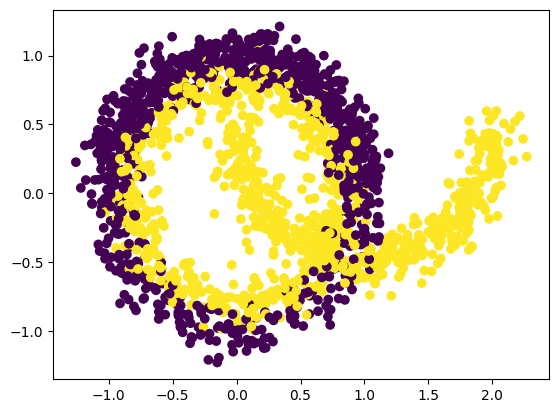

In [18]:
plt.scatter(X[:,0], X[:,1],c=y)

In [19]:
y.value_counts()

y
0    1000
1    1000
Name: count, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
X, y = generate_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Try Bagging & Boosting Algorithms
bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=42)

In [23]:
boosting_model = AdaBoostClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [24]:
models = {
    "Random Forest": rf_model,
    "Bagging": bagging_model,
    "Boosting": boosting_model
}


In [25]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8900
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       200
           1       0.89      0.89      0.89       200

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

Bagging Accuracy: 0.8900
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       200
           1       0.90      0.88      0.89       200

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

Boosting Accuracy: 0.8650
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       200
           1       0.90      0.82      0.86       200

    accuracy                           0.86       400
   macro avg       0.87      0.86      0.86   

**Random Forest**: Achieves an accuracy of 89%. Precision, recall, and F1-score for both classes (0 and 1) are balanced, indicating good performance across the board.

**Bagging**: Attains an accuracy of 89%, slightly lower than Random Forest. The precision, recall, and F1-score metrics are also well-balanced, comparable to Random Forest.

**Boosting**: Yields an accuracy of 86%, which is slightly lower than both Random Forest and Bagging. However, it still performs reasonably well. Precision, recall, and F1-score for both classes are balanced, indicating decent performance.